In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

In [26]:
# Load your embeddings (replace with actual loading code)
# lora_retriever_embeddings: shape (c, n, d)
# mpnet_embeddings: shape (c, n, d)
# c = number of classes, n = samples per class, d = embedding dimension
lora_retriever_embeddings = np.load('../results/lora_retriever_embeddings.npy')
mpnet_embeddings = np.load('../results/mpnet_embeddings.npy')
c, n, d = lora_retriever_embeddings.shape

# Flatten embeddings and create labels from array index
lora_flat = lora_retriever_embeddings.reshape(c * n, d)
mpnet_flat = mpnet_embeddings.reshape(c * n, d)
labels = np.repeat(np.arange(c), n)  # label for each embedding, based on class index

In [27]:
# Reduce dimensionality with PCA
pca = PCA(n_components=2)
lora_pca = pca.fit_transform(lora_flat)
mpnet_pca = pca.fit_transform(mpnet_flat)

In [28]:
# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=42)
lora_tsne = tsne.fit_transform(lora_flat)
mpnet_tsne = tsne.fit_transform(mpnet_flat)

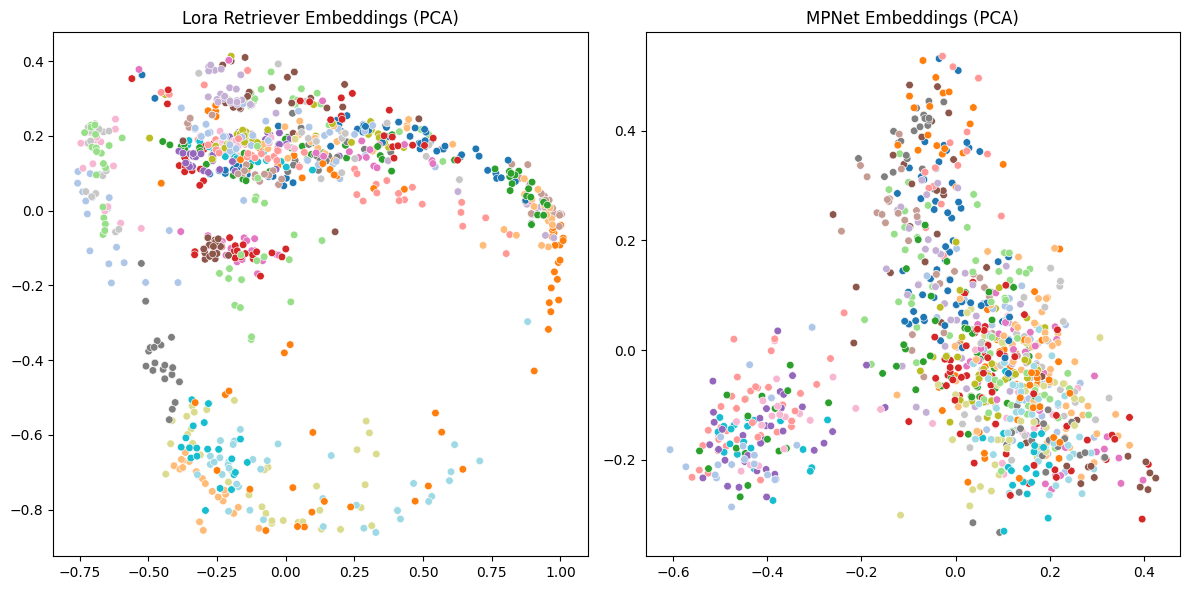

In [29]:
# Plot PCA results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=lora_pca[:,0], y=lora_pca[:,1], hue=labels, palette='tab20', legend=False, s=30)
plt.title('Lora Retriever Embeddings (PCA)')
plt.subplot(1, 2, 2)
sns.scatterplot(x=mpnet_pca[:,0], y=mpnet_pca[:,1], hue=labels, palette='tab20', legend=False, s=30)
plt.title('MPNet Embeddings (PCA)')
plt.tight_layout()
plt.show()

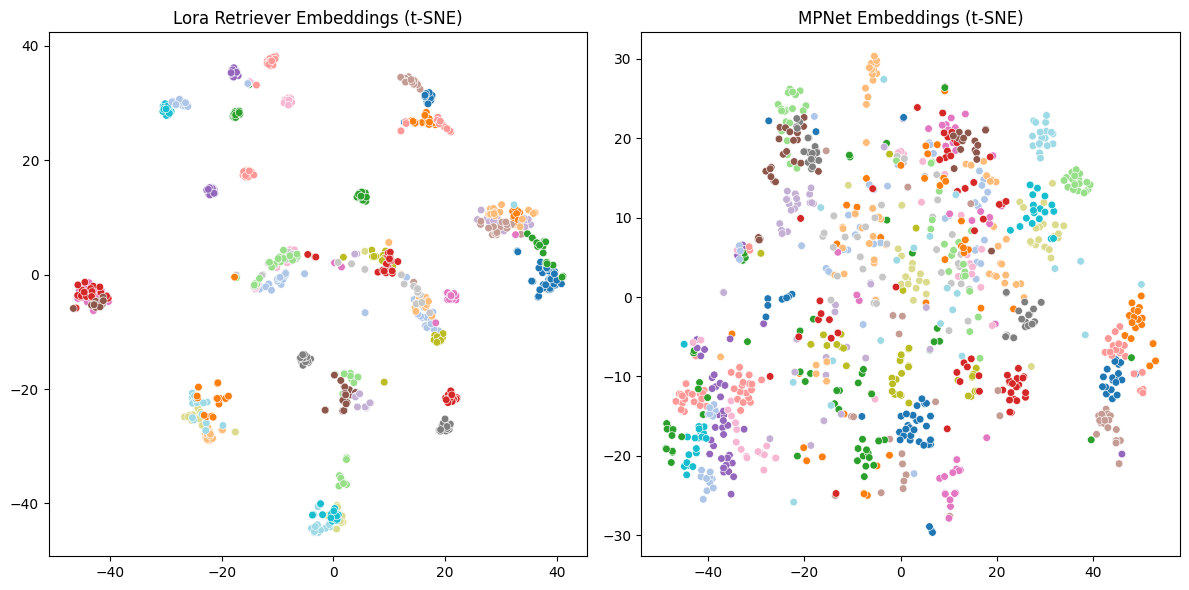

In [30]:
# Plot t-SNE results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=lora_tsne[:,0], y=lora_tsne[:,1], hue=labels, palette='tab20', legend=False, s=30)
plt.title('Lora Retriever Embeddings (t-SNE)')
plt.subplot(1, 2, 2)
sns.scatterplot(x=mpnet_tsne[:,0], y=mpnet_tsne[:,1], hue=labels, palette='tab20', legend=False, s=30)
plt.title('MPNet Embeddings (t-SNE)')
plt.tight_layout()
plt.show()